In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
def check_nulls(df):
    for col in df.columns:
        print(f"{col} : {df[col].isnull().sum()}")
        print(f"{col} : {(df[col].isnull().sum()/len(df))*100}")
        print("-------------------------------")

In [8]:
check_nulls(df)

PassengerId : 0
PassengerId : 0.0
-------------------------------
Survived : 0
Survived : 0.0
-------------------------------
Pclass : 0
Pclass : 0.0
-------------------------------
Name : 0
Name : 0.0
-------------------------------
Sex : 0
Sex : 0.0
-------------------------------
Age : 177
Age : 19.865319865319865
-------------------------------
SibSp : 0
SibSp : 0.0
-------------------------------
Parch : 0
Parch : 0.0
-------------------------------
Ticket : 0
Ticket : 0.0
-------------------------------
Fare : 0
Fare : 0.0
-------------------------------
Cabin : 687
Cabin : 77.10437710437711
-------------------------------
Embarked : 2
Embarked : 0.22446689113355783
-------------------------------


In [9]:
def check_duplicate(df):
    for col in df.columns:
        print(f"{col} : {df[col].duplicated().sum()}")
        
check_duplicate(df)

PassengerId : 0
Survived : 889
Pclass : 888
Name : 0
Sex : 889
Age : 802
SibSp : 884
Parch : 884
Ticket : 210
Fare : 643
Cabin : 743
Embarked : 887


In [10]:
null_perc = (df.isnull().sum()/len(df))*100
null_perc

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
def Fillna(df, col):
    if df[col].isnull().sum() == 0:
        print(f"No missing values in column: {col}")
        return df

    print(f"\n Processing column: {col}")
    original = df[col]

    # Create filled versions
    fills = {
        'mean': df[col].fillna(df[col].mean()),
        'median': df[col].fillna(df[col].median()),
        'mode': df[col].fillna(df[col].mode()[0]),
        'random': df[col].apply(lambda x: np.random.choice(original) if pd.isnull(x) else x),
    }

    # Plotting
    for method, filled in fills.items():
        plt.figure(figsize=(8, 5))
        sns.kdeplot(original, label='Original', color='Green', linewidth=3)
        sns.kdeplot(filled, label=f'{method} fill', color = 'orange', linewidth=2)
        plt.title(f'{col}: Original vs {method} fill')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [13]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
df[df['Ticket']=='CA2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
df2 = pd.read_csv("test.csv")
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
df2[df2['Ticket']=='CA2343']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
df[df['Name'].str.contains('Sage', na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [22]:
new_df = pd.concat([df, df2], ignore_index=True)
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

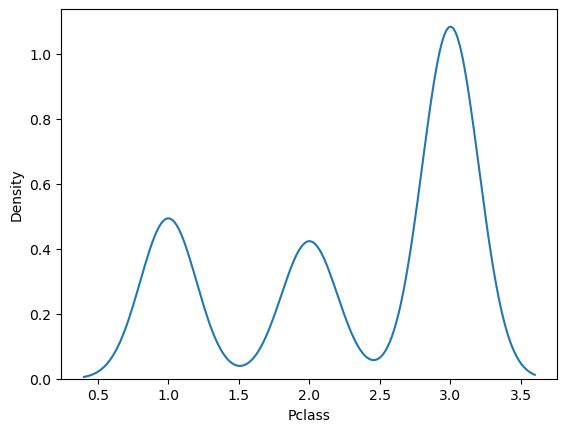

In [24]:
sns.kdeplot(data = new_df, x = 'Pclass')

In [69]:
def analyze_column(df, col):
    data = df[col].dropna()
    
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True,dropna=False) * 100


    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"Analysis of {col}", fontsize=16, fontweight='bold')
    
    # ---- 1. Box Plot ----
    sns.boxplot(x=data, ax = axes[0,0])
    axes[0, 0].set_title("Box Plot")
    
    # ---- 2. KDE Plot ----
    sns.kdeplot(data=data, fill=True, ax=axes[0, 1])
    axes[0, 1].set_title("KDE Plot")
    
    # ---- 3. Bar Chart (counts) ----
    sns.barplot(x=counts.index, y=counts.values, ax=axes[1, 0])
    axes[1, 0].set_title("Count Plot")
    axes[1, 0].set_ylabel("Count")
    for i, v in enumerate(counts.values):
        axes[1, 0].text(i, v, str(v), ha='center', va='baseline', fontweight='bold')
    
    # ---- 4. Pie Chart ----
    axes[1, 1].pie(counts,labels=counts.index,startangle=90, autopct='%1.1f%%')
    axes[1, 1].set_title("Pie Chart")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
    plt.show()
    
    # ---- 4. Summary Table ----
    summary = data.describe() 
        
    table = pd.DataFrame({
        'count': counts,
        'percent': percents.round(2)})
    
    print(f"\nSummary Table for '{col}':")

    return summary, table


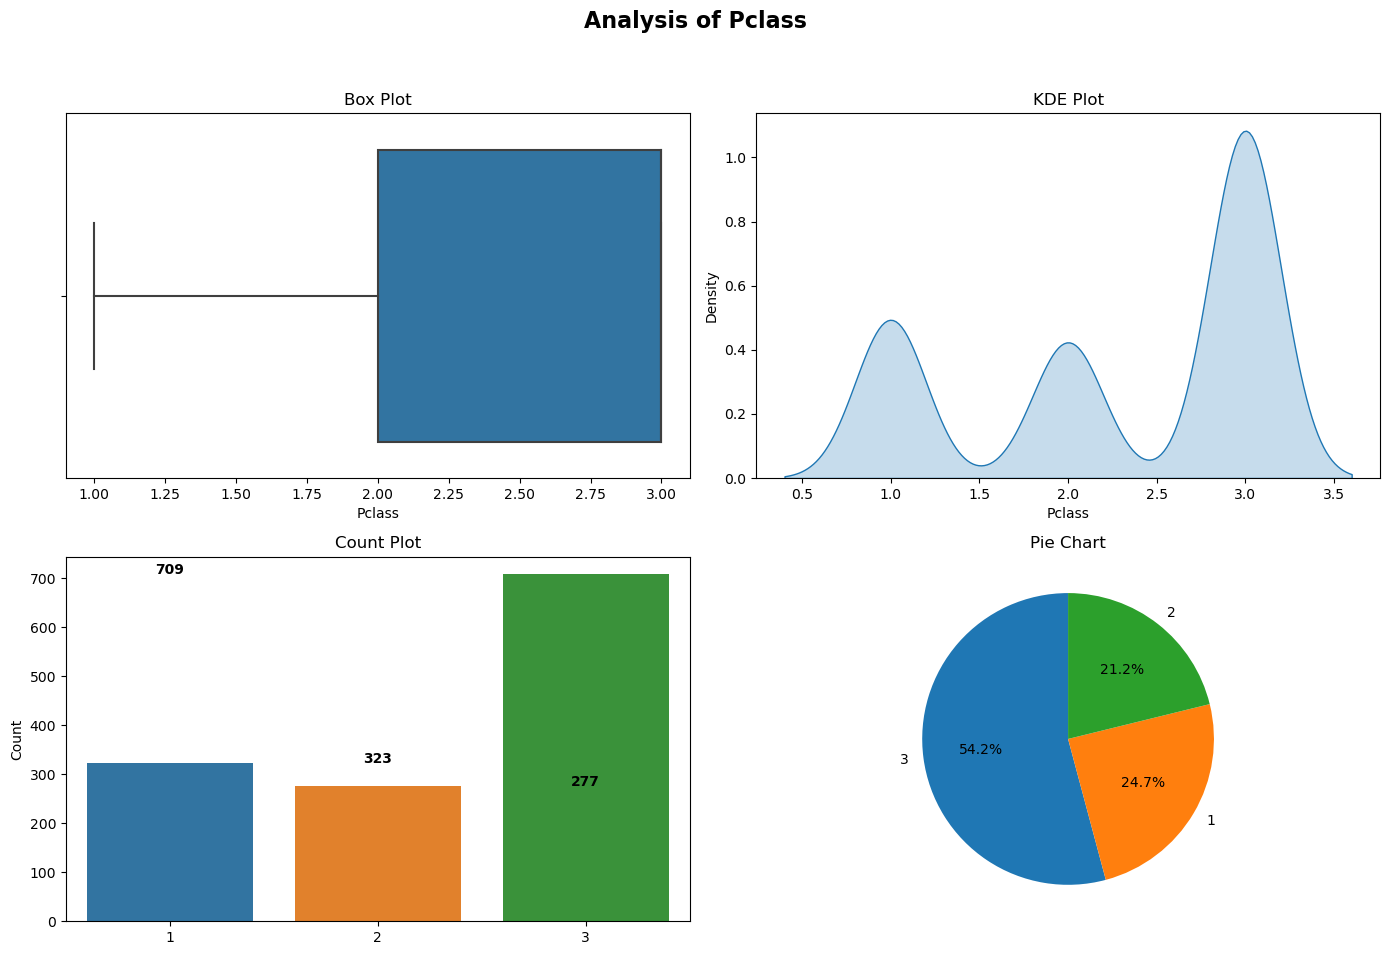


Summary Table for 'Pclass':


(count    1309.000000
 mean        2.294882
 std         0.837836
 min         1.000000
 25%         2.000000
 50%         3.000000
 75%         3.000000
 max         3.000000
 Name: Pclass, dtype: float64,
    count  percent
 3    709    54.16
 1    323    24.68
 2    277    21.16)

In [70]:
analyze_column(new_df, 'Pclass')

In [71]:
new_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


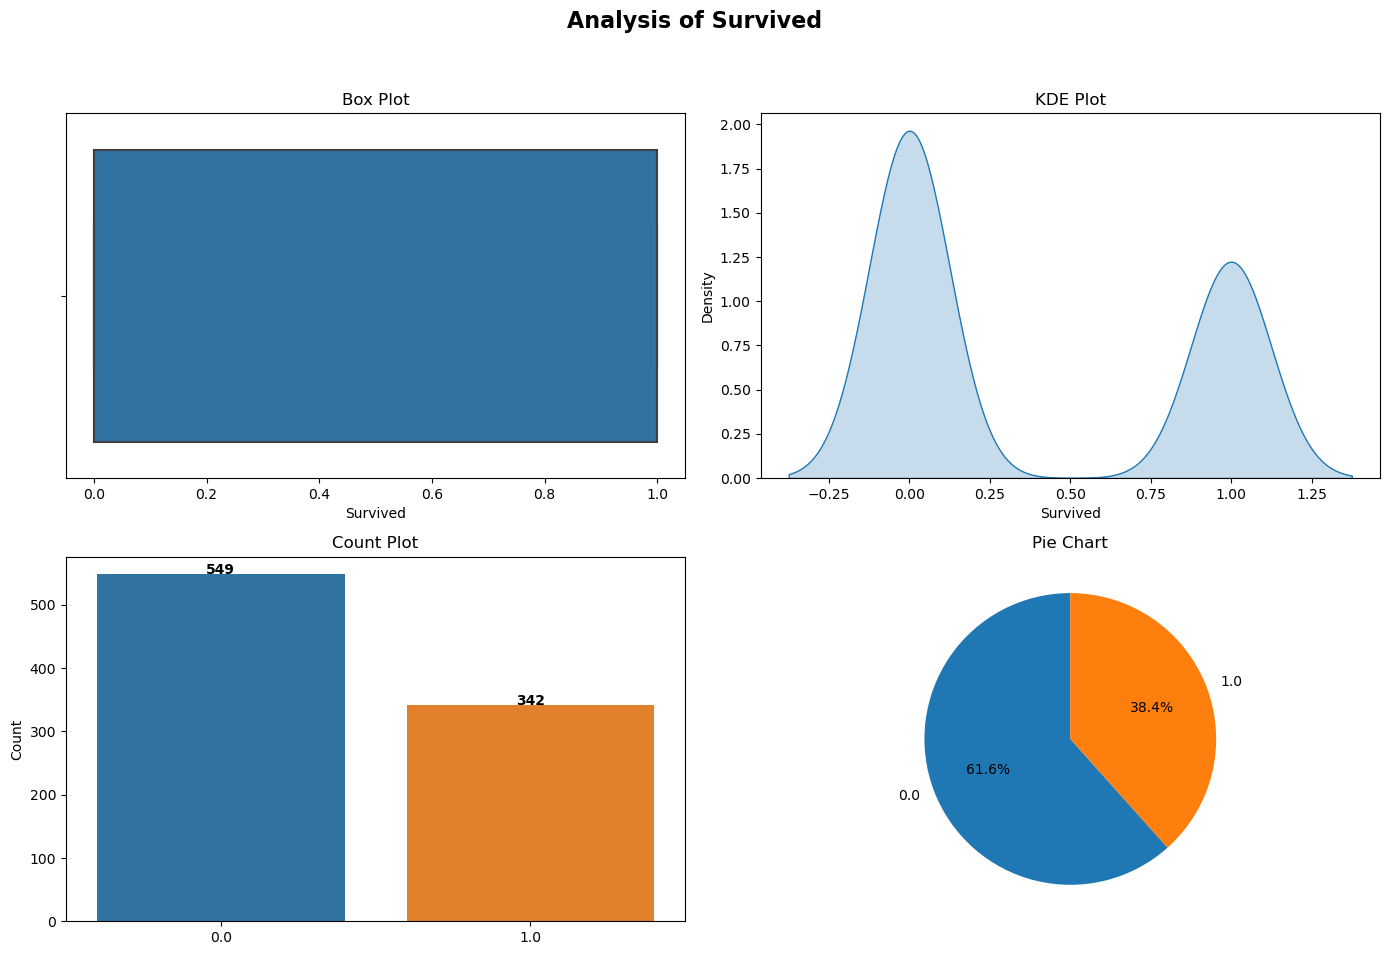


Summary Table for 'Survived':


(count    891.000000
 mean       0.383838
 std        0.486592
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000
 Name: Survived, dtype: float64,
      count  percent
 0.0  549.0    41.94
 1.0  342.0    26.13
 NaN    NaN    31.93)

In [72]:
analyze_column(new_df, 'Survived')

In [79]:
new_df['Family_size'] = new_df['SibSp'] + new_df['Parch'] + 1
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [80]:
new_df['Family_size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [84]:
conditions = [
    new_df['Family_size'] == 1,
    (new_df['Family_size'] >= 2) & (new_df['Family_size'] < 6),
    new_df['Family_size'] >= 6
]
choices = ['Alone', 'Medium', 'Large']

new_df['Family_Type'] = np.select(conditions, choices)

In [88]:
new_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Type
1106,1107,NaN,1,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S,1,Alone
63,64,0.0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,6,Large
274,275,1.0,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,1,Alone
1272,1273,NaN,3,"Foley, Mr. Joseph",male,26.0,0,0,330910,7.8792,NaN,Q,1,Alone
1069,1070,NaN,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0000,F4,S,4,Medium


In [90]:
new_df["Age"].sort_values(ascending=True).unique()

array([ 0.17,  0.33,  0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,
        3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  ,
       11.5 , 12.  , 13.  , 14.  , 14.5 , 15.  , 16.  , 17.  , 18.  ,
       18.5 , 19.  , 20.  , 20.5 , 21.  , 22.  , 22.5 , 23.  , 23.5 ,
       24.  , 24.5 , 25.  , 26.  , 26.5 , 27.  , 28.  , 28.5 , 29.  ,
       30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  , 34.  , 34.5 , 35.  ,
       36.  , 36.5 , 37.  , 38.  , 38.5 , 39.  , 40.  , 40.5 , 41.  ,
       42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  , 48.  , 49.  ,
       50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 , 56.  , 57.  ,
       58.  , 59.  , 60.  , 60.5 , 61.  , 62.  , 63.  , 64.  , 65.  ,
       66.  , 67.  , 70.  , 70.5 , 71.  , 74.  , 76.  , 80.  ,   nan])

In [93]:
conditions = [
    new_df['Age'] <= 1,
    (new_df['Age'] > 1) & (new_df['Age'] <= 5),
    (new_df['Age'] >= 6) & (new_df['Age'] <= 10),
    (new_df['Age'] >= 11) & (new_df['Age'] <= 15),
    (new_df['Age'] >= 16) & (new_df['Age'] <= 20),
    (new_df['Age'] >= 21) & (new_df['Age'] <= 25),
    (new_df['Age'] >= 26) & (new_df['Age'] <= 30),
    (new_df['Age'] >= 31) & (new_df['Age'] <= 35),
    (new_df['Age'] >= 36) & (new_df['Age'] <= 40),
    (new_df['Age'] >= 41) & (new_df['Age'] <= 50),
    (new_df['Age'] >= 51) & (new_df['Age'] <= 60),
    (new_df['Age'] >= 61) & (new_df['Age'] <= 70),
    (new_df['Age'] >= 71) & (new_df['Age'] <= 80),
    (new_df['Age'] > 80)
    ]
choices = ['0-1', '2-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-50', '51-60', '61-70', '71-80', '80+']

new_df['Age_range'] = np.select(conditions, choices)

In [94]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Type,Age_group,Age_range
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Medium,21-25,21-25
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Medium,36-40,36-40
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,26-30,26-30
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Medium,31-35,31-35
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,31-35,31-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Alone,0,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Alone,36-40,36-40
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Alone,36-40,36-40
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Alone,0,0


In [96]:
conditions = [(new_df['Age'] <= 1),
    (new_df['Age'] >= 1) & (new_df['Age'] <= 5),
    (new_df['Age'] >= 6) & (new_df['Age'] <= 12),
    (new_df['Age'] >= 13) & (new_df['Age'] <= 19),
    (new_df['Age'] >= 20) & (new_df['Age'] <= 34),
    (new_df['Age'] >= 35) & (new_df['Age'] <= 60),
    (new_df['Age'] >= 61)
    ]
choices = ['Infant', 'Toddler', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

new_df['Age_group'] = np.select(conditions, choices)

In [97]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Type,Age_group,Age_range
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Medium,Young Adult,21-25
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Medium,Adult,36-40
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,Young Adult,26-30
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Medium,Adult,31-35
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,Adult,31-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Alone,0,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Alone,Adult,36-40
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Alone,Adult,36-40
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Alone,0,0


<AxesSubplot:>

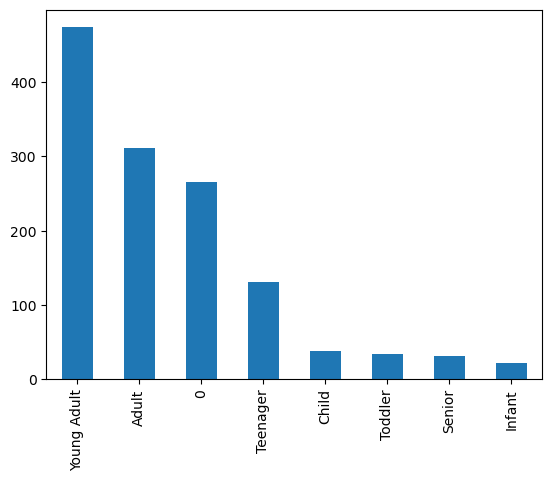

In [98]:
new_df['Age_group'].value_counts().plot(kind='bar')

<AxesSubplot:>

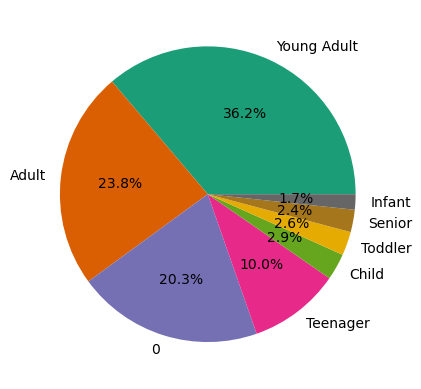

In [109]:
counts = new_df['Age_group'].value_counts()

counts.plot(kind='pie',autopct='%1.1f%%',colormap='Dark2',ylabel='')

In [117]:
def Cat_column(df, col):
    
    data = df[col].dropna()
    
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True,dropna=False) * 100

    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    # Bar chart
    counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f"{col} - Bar Chart")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")

    # Pie chart
    counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='Set3')
    axes[1].set_ylabel("")
    axes[1].set_title(f"{col} - Pie Chart")

    plt.tight_layout()
    plt.show()
    
    # ---- 4. Summary Table ----
    summary = data.describe() 
        
    table = pd.DataFrame({
        'count': counts,
        'percent': percents.round(2)})
    
    print(f"\nSummary Table for '{col}':")

    return summary, table


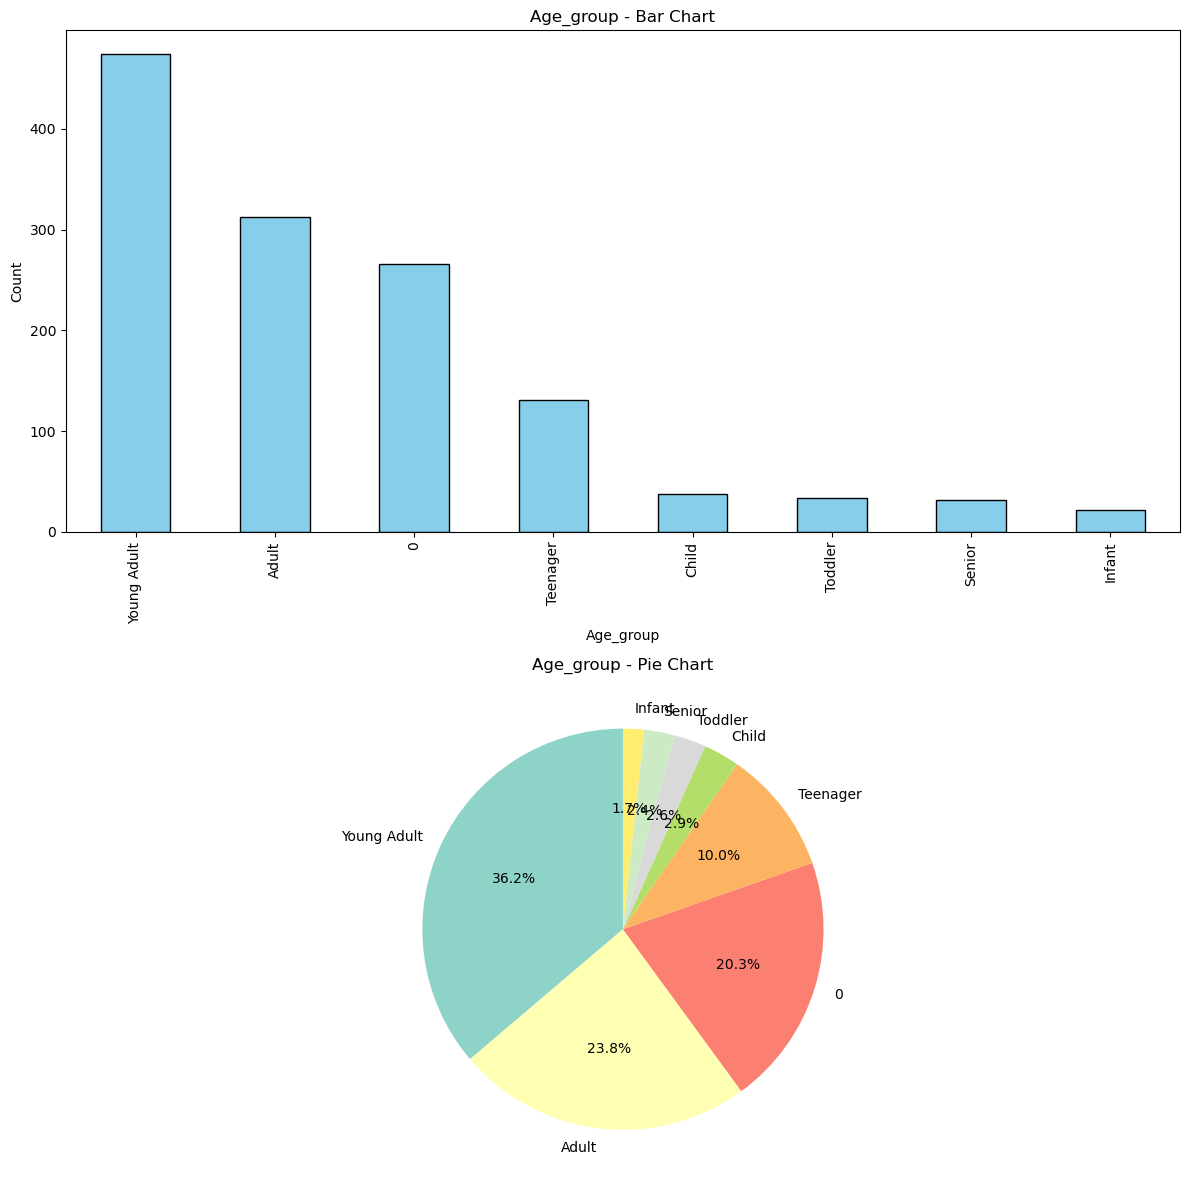


Summary Table for 'Age_group':


(count            1309
 unique              8
 top       Young Adult
 freq              474
 Name: Age_group, dtype: object,
              count  percent
 Young Adult    474    36.21
 Adult          312    23.83
 0              266    20.32
 Teenager       131    10.01
 Child           38     2.90
 Toddler         34     2.60
 Senior          32     2.44
 Infant          22     1.68)

In [118]:
Cat_column(new_df, "Age_group")

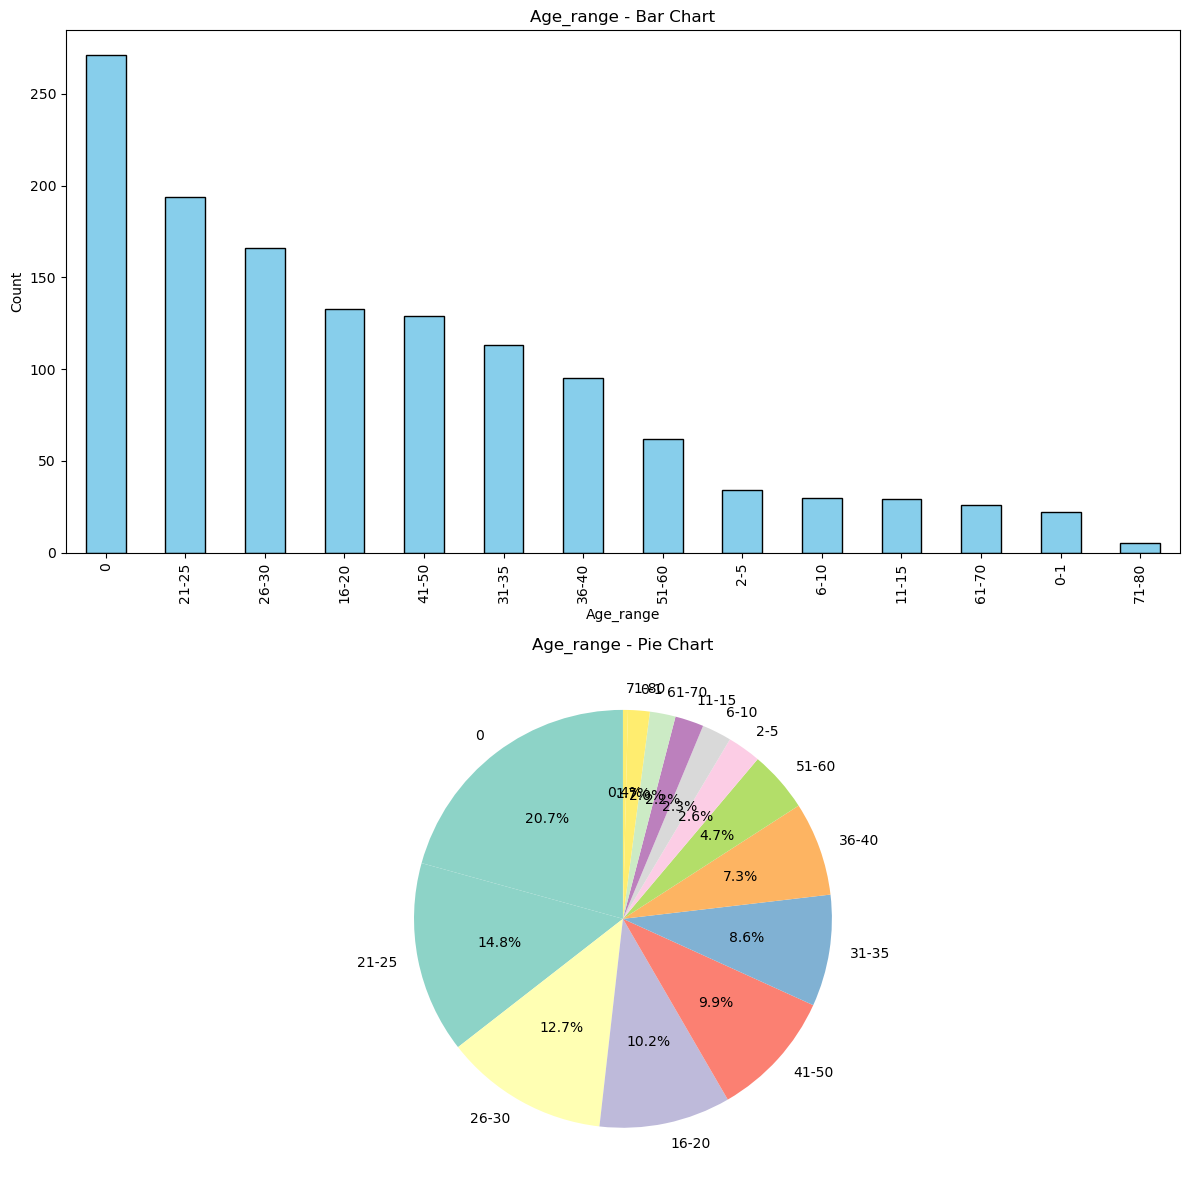


Summary Table for 'Age_range':


(count     1309
 unique      14
 top          0
 freq       271
 Name: Age_range, dtype: object,
        count  percent
 0        271    20.70
 21-25    194    14.82
 26-30    166    12.68
 16-20    133    10.16
 41-50    129     9.85
 31-35    113     8.63
 36-40     95     7.26
 51-60     62     4.74
 2-5       34     2.60
 6-10      30     2.29
 11-15     29     2.22
 61-70     26     1.99
 0-1       22     1.68
 71-80      5     0.38)

In [119]:
Cat_column(new_df, "Age_range")

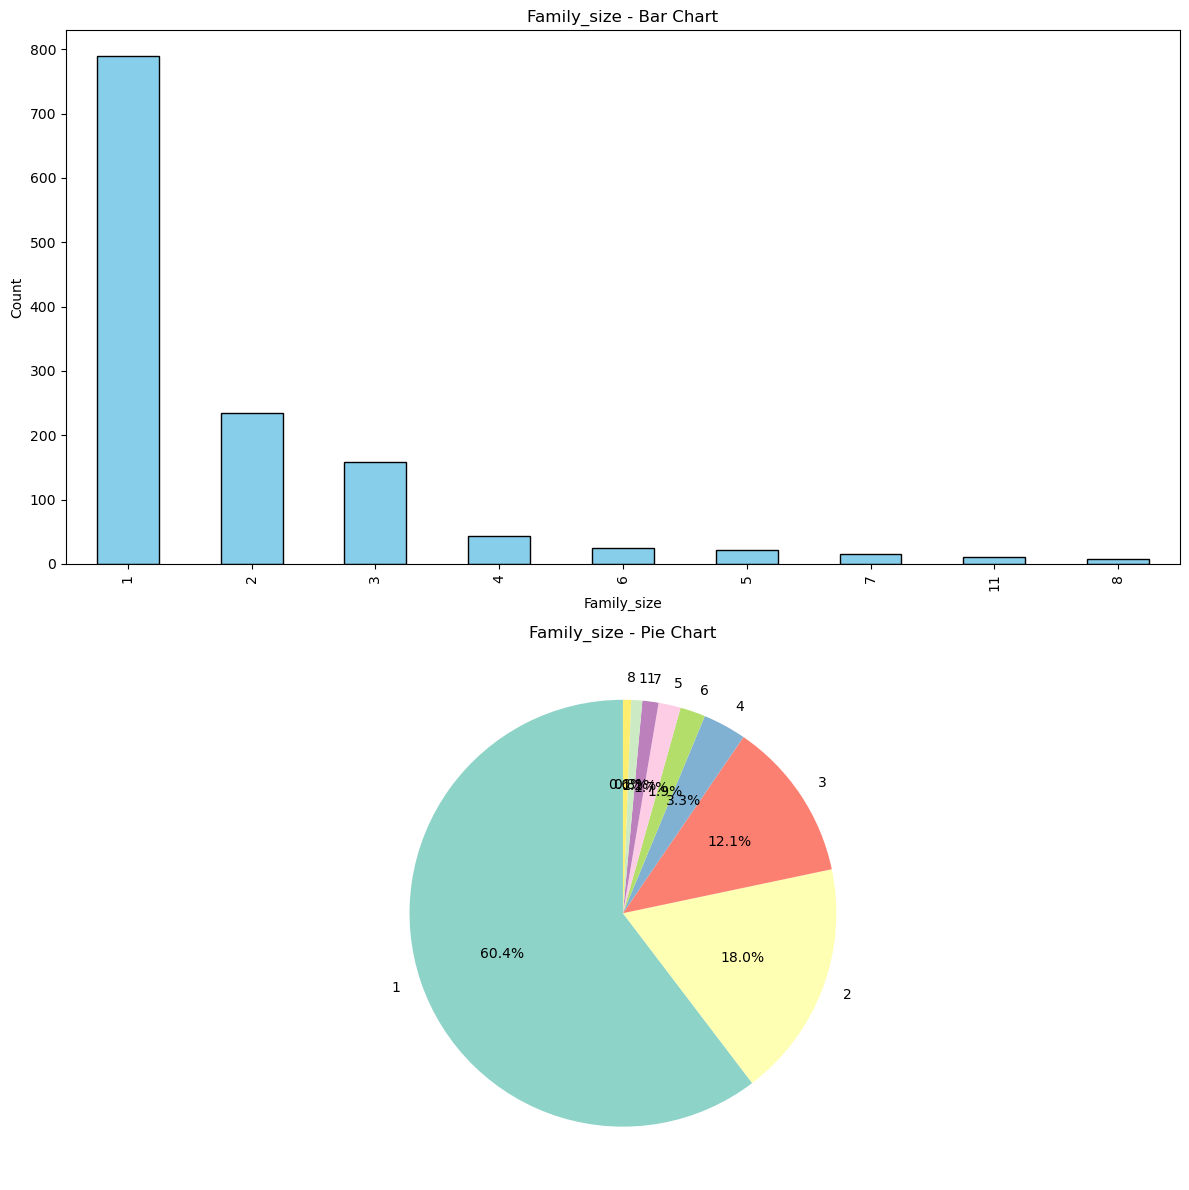


Summary Table for 'Family_size':


(count    1309.000000
 mean        1.883881
 std         1.583639
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         2.000000
 max        11.000000
 Name: Family_size, dtype: float64,
     count  percent
 1     790    60.35
 2     235    17.95
 3     159    12.15
 4      43     3.28
 6      25     1.91
 5      22     1.68
 7      16     1.22
 11     11     0.84
 8       8     0.61)

In [120]:
Cat_column(new_df, "Family_size")